In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv('cancer_reg.csv', encoding = 'Latin1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
df.shape

(3047, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [7]:
df.drop(['binnedInc','Geography','PctSomeCol18_24'], axis = 1, inplace = True)

In [8]:
df.isnull().sum()[df.isnull().sum()!=0]

PctEmployed16_Over         152
PctPrivateCoverageAlone    609
dtype: int64

In [9]:
# PctSomeCol18_24 since this column contains 75 percent null value hence we will drop this column

In [10]:
df.PctEmployed16_Over.describe()

count    2895.000000
mean       54.152642
std         8.315064
min        17.600000
25%        48.600000
50%        54.500000
75%        60.300000
max        80.100000
Name: PctEmployed16_Over, dtype: float64

In [11]:
df.PctPrivateCoverageAlone.describe()

count    2438.000000
mean       48.453774
std        10.083006
min        15.700000
25%        41.000000
50%        48.700000
75%        55.600000
max        78.900000
Name: PctPrivateCoverageAlone, dtype: float64

In [12]:
df.PctEmployed16_Over.fillna(df.PctEmployed16_Over.median(), inplace = True)
df.PctPrivateCoverageAlone.fillna(df.PctPrivateCoverageAlone.median(), inplace = True)

In [13]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [15]:
df.select_dtypes(include = np.number).columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

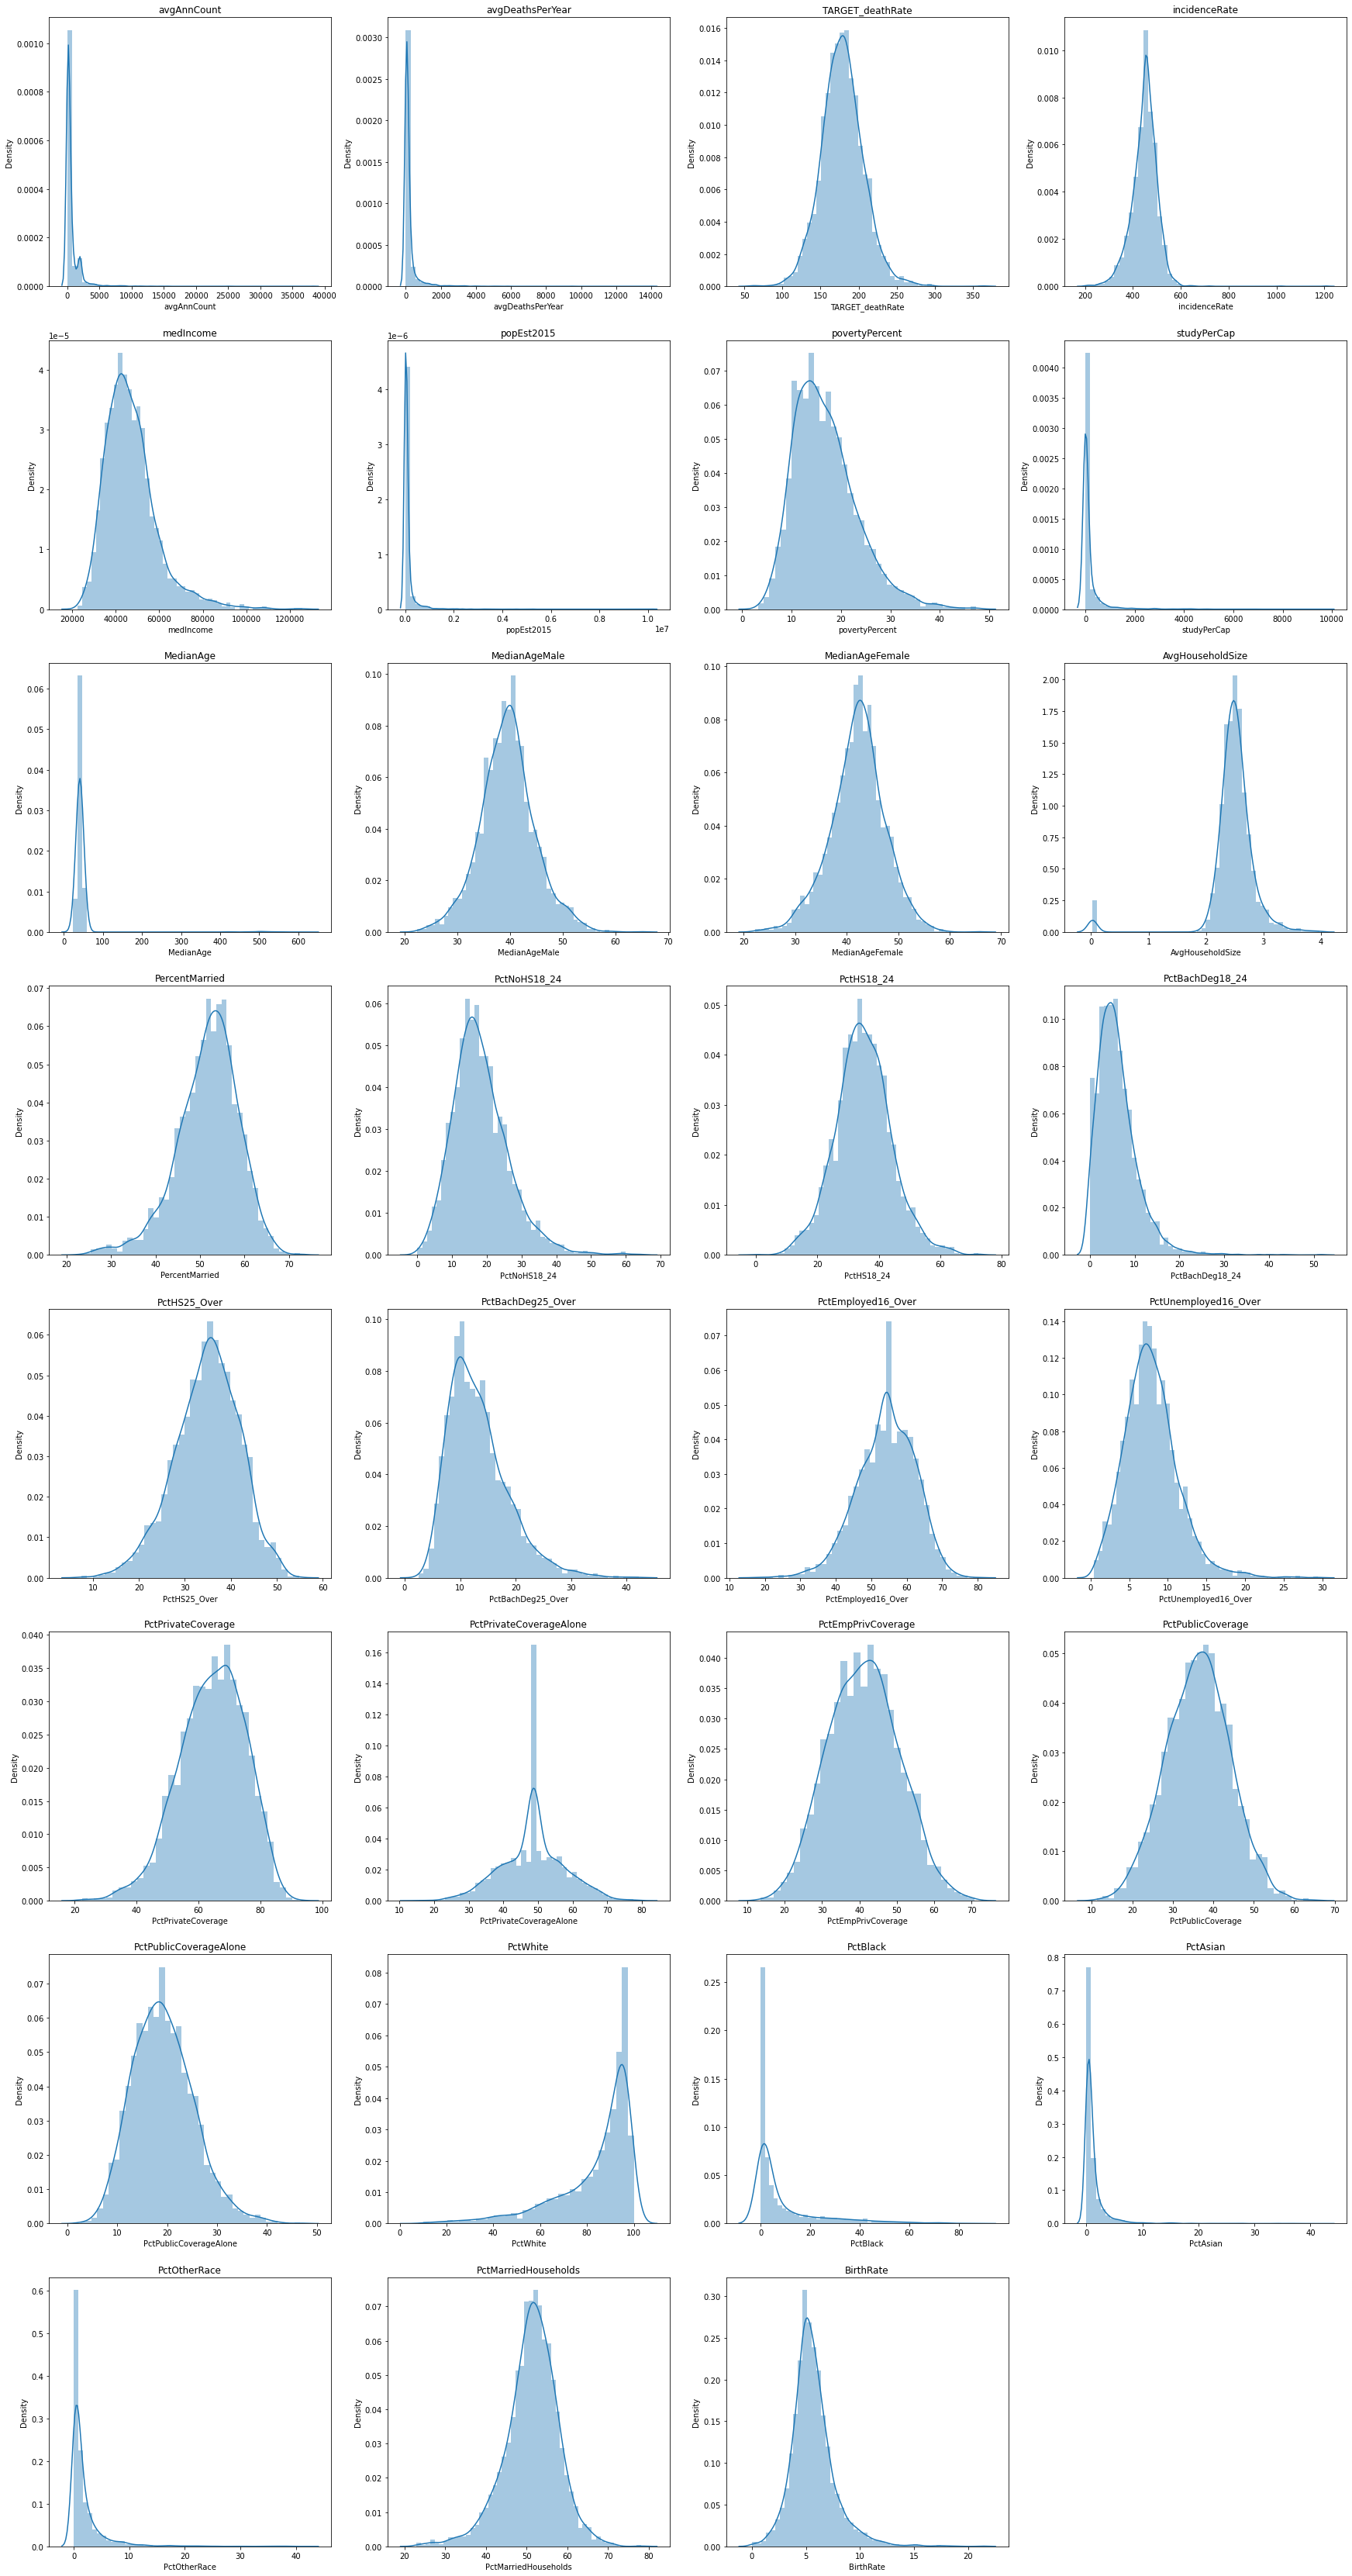

In [16]:
cols = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate']

a = 8
b = 4
c = 1

plt.figure(figsize = [30,60])
for i in cols:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.distplot(df.loc[:,i])
    c = c + 1
    
plt.tight_layout
plt.show()

In [17]:
df['log target'] = np.log(df['TARGET_deathRate'])

In [18]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,log target
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,48.7,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,5.105339
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,5.083266
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,5.163070
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,5.271973
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,4.972587


## Normal Model

In [19]:
# Ho: model is not significant
# Ha: model is significant
# Since p values is less tha 5% the model is significant

In [20]:
x = df.drop(['TARGET_deathRate','log target'],axis=1)
y = df['log target']

newx = sm.add_constant(x)

xtrain, xtest, ytrain, ytest = train_test_split(newx, y, test_size = 0.30, random_state = 1)

In [21]:
xtrain.mean()

const                           1.000000
avgAnnCount                   613.385785
avgDeathsPerYear              183.537992
incidenceRate                 448.816467
medIncome                   47029.474203
popEst2015                 102506.405722
povertyPercent                 16.889681
studyPerCap                   158.003002
MedianAge                      44.298687
MedianAgeMale                  39.559475
MedianAgeFemale                42.140009
AvgHouseholdSize                2.479013
PercentMarried                 51.756285
PctNoHS18_24                   18.134897
PctHS18_24                     34.981660
PctBachDeg18_24                 6.201173
PctHS25_Over                   34.949578
PctBachDeg25_Over              13.225797
PctEmployed16_Over             54.139681
PctUnemployed16_Over            7.843574
PctPrivateCoverage             64.393011
PctPrivateCoverageAlone        48.466370
PctEmpPrivCoverage             41.237899
PctPublicCoverage              36.305113
PctPublicCoverag

In [22]:
xtest.mean()

const                           1.000000
avgAnnCount                   589.918086
avgDeathsPerYear              191.622951
incidenceRate                 446.991992
medIncome                   47142.055738
popEst2015                 102942.525683
povertyPercent                 16.851366
studyPerCap                   149.332917
MedianAge                      47.540984
MedianAgeMale                  39.596940
MedianAgeFemale                42.157705
AvgHouseholdSize                2.481174
PercentMarried                 51.814208
PctNoHS18_24                   18.433115
PctHS18_24                     35.049617
PctBachDeg18_24                 6.058361
PctHS25_Over                   34.466995
PctBachDeg25_Over              13.413005
PctEmployed16_Over             54.240546
PctUnemployed16_Over            7.873005
PctPrivateCoverage             64.266230
PctPrivateCoverageAlone        48.588306
PctEmpPrivCoverage             41.099454
PctPublicCoverage              36.130383
PctPublicCoverag

In [23]:
stats.ttest_ind(xtrain,xtest)

Ttest_indResult(statistic=array([        nan,  0.41918638, -0.4057326 ,  0.84606866, -0.2365582 ,
       -0.03352962,  0.15124121,  0.41415315, -1.81151588, -0.18136624,
       -0.08458072, -0.12737758, -0.21246688, -0.93235086, -0.18955702,
        0.79780828,  1.73629856, -0.87801997, -0.31483068, -0.21567151,
        0.30125222, -0.34202638,  0.37073074,  0.56373423,  0.58868742,
        0.2110502 ,  0.14221025,  0.21044672, -0.72253898, -0.19126176,
        0.15322928]), pvalue=array([       nan, 0.67510949, 0.68496759, 0.39758092, 0.81301546,
       0.97325445, 0.87979546, 0.67879112, 0.07015952, 0.85609219,
       0.93260029, 0.89864997, 0.83175703, 0.35122915, 0.8496689 ,
       0.42504397, 0.0826122 , 0.38000215, 0.75291179, 0.82925826,
       0.76324274, 0.73235464, 0.71086388, 0.57297653, 0.55611464,
       0.83286222, 0.88692335, 0.83333311, 0.47001866, 0.84833327,
       0.87822762]))

In [24]:
ytrain.mean(),ytest.mean()

(5.175267505348009, 5.168274902348785)

In [25]:
stats.ttest_ind(ytrain,ytest)

Ttest_indResult(statistic=1.1130381969890948, pvalue=0.26577988207334)

In [26]:
normalmodel = sm.OLS(ytrain, xtrain).fit()
normalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log target   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     73.64
Date:                Wed, 18 May 2022   Prob (F-statistic):          3.26e-301
Time:                        09:00:48   Log-Likelihood:                 1675.5
No. Observations:                2132   AIC:                            -3289.
Df Residuals:                    2101   BIC:                            -3113.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.1446      0.106     48.586      0.000       4.937       5.352
avgAnnCount             -1.638e-05   5.12e-06     -3.201      0.001   -2.64e-05   -6.35e-06
avgDeathsPerYear            0.0001   2.79e-05      4.253      0.000    6.38e-05       0.000
incidenceRate               0.0011   5.11e-05     21.384      0.000       0.001       0.001
medIncome                7.226e-07   5.43e-07      1.330      0.184   -3.43e-07    1.79e-06
popEst2015              -1.163e-07   3.79e-08     -3.069      0.002   -1.91e-07    -4.2e-08
povertyPercent              0.0015      0.001      1.313      0.189      -0.001       0.004
studyPerCap             -4.109e-06   4.61e-06     -0.891      0.373   -1.32e-05    4.94e-06
MedianAge                6.562e-08   6.16e-05      0.001      0.999      -0.000       0.000
MedianAgeMale              -0.0043      0.001     -3.048      0.002      -0.007      -0.002
MedianAgeFemale             0.0004      0.002      0.281      0.779      -0.003       0.003
AvgHouseholdSize            0.0032      0.007      0.481      0.631      -0.010       0.016
PercentMarried              0.0084      0.001      7.216      0.000       0.006       0.011
PctNoHS18_24               -0.0013      0.000     -3.487      0.000      -0.002      -0.001
PctHS18_24                  0.0012      0.000      3.390      0.001       0.000       0.002
PctBachDeg18_24            -0.0009      0.001     -1.212      0.226      -0.002       0.001
PctHS25_Over                0.0017      0.001      2.593      0.010       0.000       0.003
PctBachDeg25_Over          -0.0079      0.001     -7.562      0.000      -0.010      -0.006
PctEmployed16_Over         -0.0027      0.001     -3.928      0.000      -0.004      -0.001
PctUnemployed16_Over        0.0005      0.001      0.453      0.650      -0.002       0.003
PctPrivateCoverage         -0.0040      0.001     -4.211      0.000      -0.006      -0.002
PctPrivateCoverageAlone     0.0004      0.001      0.687      0.492      -0.001       0.002
PctEmpPrivCoverage          0.0033      0.001      4.517      0.000       0.002       0.005
PctPublicCoverage           0.0014      0.002      0.868      0.386      -0.002       0.004
PctPublicCoverageAlone     -0.0015      0.002     -0.772      0.440      -0.005       0.002
PctWhite                   -0.0013      0.000     -3.338      0.001      -0.002      -0.001
PctBlack                   -0.0005      0.000     -1.368      0.171      -0.001       0.000
PctAsian                   -0.0014      0.001     -1.155      0.248      -0.004       0.001
PctOtherRace               -0.0043      0.001     -4.994      0.000      -0.006      -0.003
PctMarriedHouseholds       -0.0077      0.001     -7.021      0.000      -0.010      -0.006
BirthRate                  -0.0050      0.001  

In [27]:
train_pred = normalmodel.predict(xtrain)
rmse = np.sqrt(mean_squared_error(ytrain,train_pred))
rmse

0.11027075952892794

In [28]:
train_pred = normalmodel.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,train_pred))
rmse

0.11152139438696516

## SFS Model

In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lr = LinearRegression()
SFS = sfs(estimator = lr, k_features = 'best', scoring = 'r2', cv =5)

sfsmodel = SFS.fit(xtrain,ytrain)

print('Imp Feature: ', sfsmodel.k_feature_names_)
print('Rsquared: ', sfsmodel.k_score_)

Imp Feature:  ('avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctWhite', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate')
Rsquared:  0.4914173550107061


In [30]:
x = df.loc[:,['incidenceRate', 'povertyPercent', 'PctHS18_24', 'PctBachDeg25_Over', 'PctOtherRace']]
y = df.TARGET_deathRate

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)

In [43]:
mdf = lr.fit(xtrain,ytrain)
mdf.score(xtrain,ytrain)

0.47459289525983916

In [44]:
pred_train = mdf.predict(xtrain)

rmse = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse

19.86793202174577

In [31]:
sfs_model = sm.OLS(ytrain, xtrain).fit()
sfs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          3.189e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):                        0.00
Time:                        09:00:52   Log-Likelihood:                         -9493.2
No. Observations:                2132   AIC:                                  1.900e+04
Df Residuals:                    2127   BIC:                                  1.902e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
incidenceRate         0.2920      0.006     49.467      0.000       0.280       0.304
povertyPercent        1.6677      0.075     22.313      0.000       1.521       1.814
PctHS18_24            0.7656      0.048     16.054      0.000       0.672       0.859
PctBachDeg25_Over    -0.5200      0.089     -5.827      0.000      -0.695      -0.345
PctOtherRace         -0.3113      0.131     -2.381      0.017      -0.568      -0.055
==============================================================================
Omnibus:                      195.062   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1318.198
Skew:                          -0.017   Prob(JB):                    5.71e-287
Kurtosis:                       6.852   Cond. No.                         135.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
train_pred = sfs_model.predict(xtrain)
rmse = np.sqrt(mean_squared_error(ytrain,train_pred))
rmse

20.775825843126977

In [33]:
train_pred = sfs_model.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,train_pred))
rmse

21.099115638986493

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Ridge, Lasso, SGDRegressor, LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
lr = LinearRegression()

## Ridge Model

In [37]:
# train set

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 0.0001, normalize = True)

ridge_model = ridge.fit(xtrain, ytrain).predict(xtrain)

ridge_r2 = r2_score(ytrain, ridge_model)   

ridge_rmse = np.sqrt(mean_squared_error(ytrain, ridge_model))

print('Rsquared: ', ridge_r2)
print('ridge_rmse: ', ridge_rmse)

Rsquared:  0.47459289271737815
ridge_rmse:  19.867932069816533


In [38]:
# test set

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 0.0001, normalize = True)

pred_ridge = ridge.fit(xtrain, ytrain).predict(xtest)  

ridge_r2 = r2_score(ytest, pred_ridge)   

ridge_rmse = np.sqrt(mean_squared_error(ytest, pred_ridge))

print('Rsquared: ', ridge_r2)
print('ridge_rmse: ', ridge_rmse)

Rsquared:  0.5034697408994833
ridge_rmse:  20.083832598535945


## SGDRegressor Model

In [50]:
from sklearn.linear_model import SGDRegressor
ridge = SGDRegressor(alpha = 0.001)

pred_ridge = ridge.fit(xtrain, ytrain).predict(xtest)  

ridge_r2 = r2_score(ytest, pred_ridge)   

ridge_rmse = np.sqrt(mean_squared_error(ytest, pred_ridge))

print('Rsquared: ', ridge_r2)
print('ridge_rmse: ', ridge_rmse)

Rsquared:  -4.655580629877236e+24
ridge_rmse:  61497952838300.73


## Lasso Model

In [40]:
# train set

lasso = Lasso(alpha = 0.001, normalize = True)
pred_lasso = lasso.fit(xtrain, ytrain).predict(xtrain)

lasso_r2 = r2_score(ytrain, pred_lasso)

lasso_rmse = np.sqrt(mean_squared_error(ytrain, pred_lasso))

print('Rsquared: ',lasso_r2)
print('lasso_rmse',lasso_rmse)

Rsquared:  0.4745832552056606
lasso_rmse 19.868114287136603


In [41]:
# test set

lasso = Lasso(alpha = 0.001, normalize = True)
pred_lasso = lasso.fit(xtrain, ytrain).predict(xtest)

lasso_r2 = r2_score(ytest, pred_lasso)

lasso_rmse = np.sqrt(mean_squared_error(ytest, pred_lasso))

print('Rsquared: ',lasso_r2)
print('lasso_rmse',lasso_rmse)

Rsquared:  0.5031437554246088
lasso_rmse 20.090424305046227
